In [4]:
#importing the library
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [5]:
#import dataset
loandata_df = pd.read_csv('Data/loan_cleaned.csv', index_col='id')

#see the columns in our data
loandata_df.info()

# take a look at the head of the dataset
loandata_df.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 1077501 to 36271262
Columns: 137 entries, member_id to int_rate
dtypes: float64(10), int64(127)
memory usage: 934.3 MB


,member_id,loan_amnt,funded_amnt_inv,annual_inc,dti,delinq_2yrs,inq_last_6mths,total_acc,total_pymnt,total_pymnt_inv,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,int_rate
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000.0,4975.0,24000.0,27.65,0.0,1.0,9.0,5861.071414,5831.78,...,0,0,0,0,0,0,0,0,0,10.65
1077430,1314167,2500.0,2500.0,30000.0,1.00,0.0,5.0,4.0,1008.710000,1008.71,...,0,0,0,0,0,0,0,0,0,15.27
1077175,1313524,2400.0,2400.0,12252.0,8.72,0.0,2.0,10.0,3003.653644,3003.65,...,0,0,0,0,0,0,0,0,0,15.96
1076863,1277178,10000.0,10000.0,49200.0,20.00,0.0,1.0,37.0,12226.302212,12226.30,...,0,0,0,0,0,0,0,0,0,13.49
1075358,1311748,3000.0,3000.0,80000.0,17.94,0.0,0.0,38.0,3242.170000,3242.17,...,0,0,0,0,0,0,0,0,0,12.69


In [33]:
#create our X and y
X = loandata_df.drop('int_rate', axis=1)
y = loandata_df['int_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [34]:
#initializing models
lm=LinearRegression()

In [35]:
lm_lasso=Lasso()

In [36]:
lm_ridge = Ridge()

In [37]:
lm_elastic = ElasticNet()

In [38]:
lm_ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
lm_lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
lm_elastic

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
#fitting the linear regression model
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
#Predicting the Test set result
lm_pred = lm.predict(X_test)

In [44]:
#printing the result of the lm_regression_model
print(lm_pred[0:5])

[15.23614833 10.09898804  7.84902089 16.18529726 16.58571947]


In [45]:
#printing the actual data
print(y_test[0:5])

id
63398958    15.61
27610673    10.15
49925091     7.89
28102260    15.61
57324697    16.99
Name: int_rate, dtype: float64


In [46]:
#fitting the lasso regression model
lm_lasso.fit(X_train, y_train)

C:\Users\rudha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
#Predicting the Test set result
lm_lasso_pred = lm_lasso.predict(X_test)
#printing the result of the lm_regression_model
print(lm_lasso_pred[0:5])

[11.22807247 14.04246897 13.26755847 13.39838371 14.540159  ]


In [48]:
#printing the actual data
print(y_test[0:5])

id
63398958    15.61
27610673    10.15
49925091     7.89
28102260    15.61
57324697    16.99
Name: int_rate, dtype: float64


In [50]:
#fitting the ridge regression model
lm_ridge.fit(X_train, y_train)

C:\Users\rudha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.139552e-21
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
#Predicting the Test set result
lm_ridge_pred = lm_ridge.predict(X_test)
#printing the result of the lm_regression_model
print(lm_ridge_pred[0:5])

[15.2362343  10.09909689  7.84908172 16.18531733 16.58577526]


In [53]:
#fitting the elasticnet regression model
lm_elastic.fit(X_train, y_train)

C:\Users\rudha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
#Predicting the Test set result
lm_elastic_pred = lm_elastic.predict(X_test)
#printing the result of the lm_regression_model
print(lm_elastic_pred[0:5])

[12.31143006 13.74444301 12.51861096 13.79117625 14.59621737]


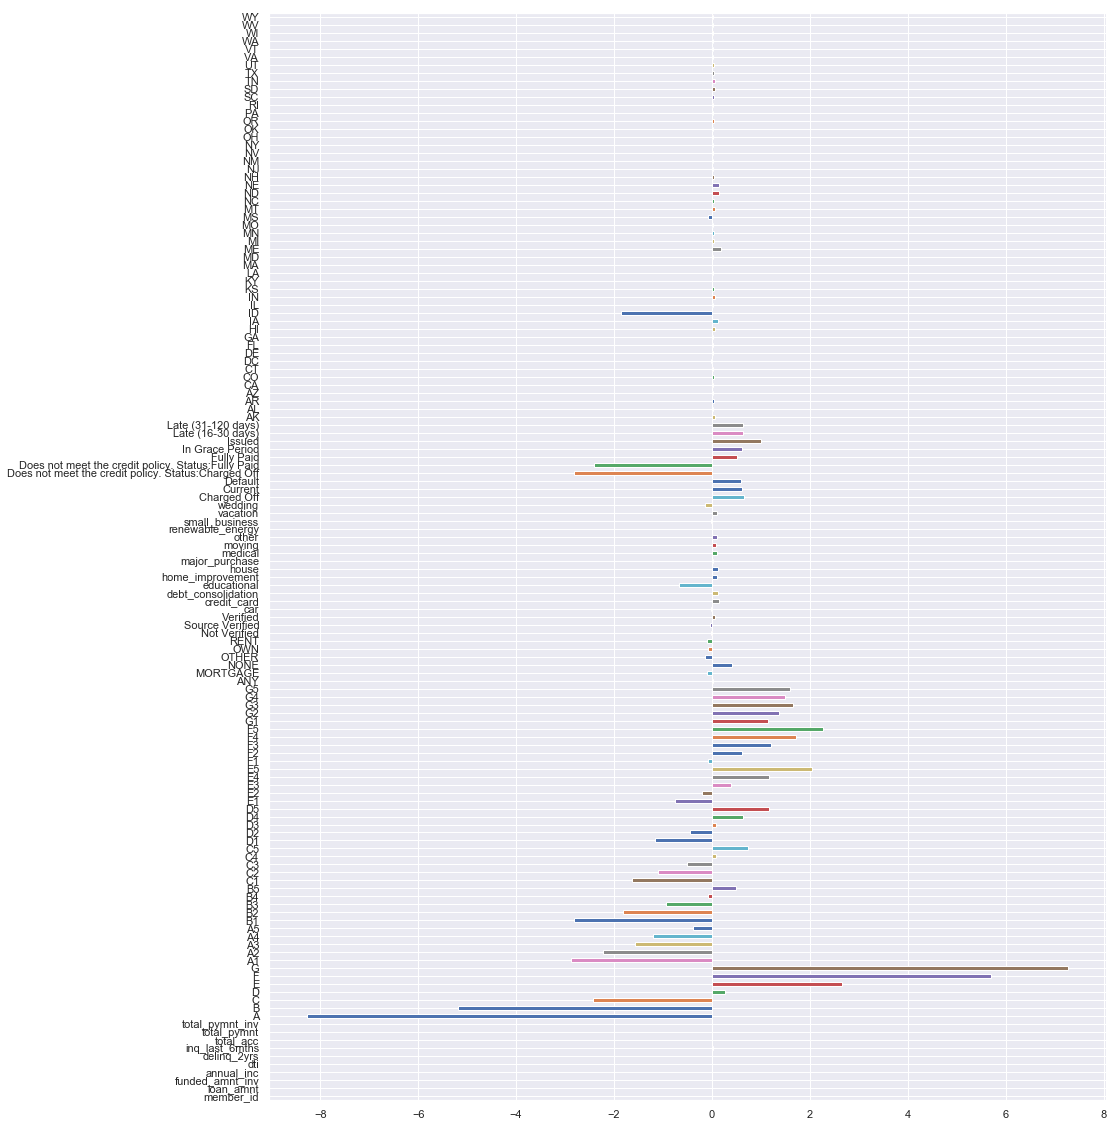

In [55]:
#graph depicting regression models with features
plt.figure(figsize=(15,20))
ft_importances_lm = pd.Series(lm.coef_, index = X.columns)
ft_importances_lm.plot(kind='barh')
plt.show();


In [60]:
print("RSquare value for Simple Regression Test Data is:")
np.round(lm.score(X_test, y_test)*100,2)


RSquare value for Simple Regression Test Data is:


98.09

In [57]:
print("RSquare value for Lasso Regression Test Data is:")
np.round(lm_lasso.score(X_test, y_test)*100,2)


RSquare value for Lasso Regression Test Data is:


6.72

In [58]:
print("RSquare value for Ridge Regression Test Data is:")
np.round(lm_ridge.score(X_test, y_test)*100,2)

RSquare value for Ridge Regression Test Data is:


98.09

In [59]:
print("RSquare value for ElasticNet Regression Test Data is:")
np.round(lm_elastic.score(X_test, y_test)*100,2)

RSquare value for ElasticNet Regression Test Data is:


18.14

In [61]:
from sklearn import metrics

In [64]:
print("MSE value for Simple Regression Test Data is:")
np.round(metrics.mean_squared_error( y_test, lm_pred),2)

MSE value for Simple Regression Test Data is:


0.37

In [65]:
print("MSE value for Lasso Regression Test Data is:")
np.round(metrics.mean_squared_error( y_test, lm_lasso_pred),2)

MSE value for Lasso Regression Test Data is:


17.96

In [66]:
print("MSE value for Ridge Regression Test Data is:")
np.round(metrics.mean_squared_error( y_test, lm_ridge_pred),2)

MSE value for Ridge Regression Test Data is:


0.37

In [67]:
print("MSE value for ElasticNet Regression Test Data is:")
np.round(metrics.mean_squared_error( y_test, lm_elastic_pred),2)

MSE value for ElasticNet Regression Test Data is:


15.77

reference links:
https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-regularized-logistic-regression-lasso-regression-721f311130fb
https://medium.com/coinmonks/regularization-of-linear-models-with-sklearn-f88633a93a2
https://medium.com/@jayeshbahire/lasso-ridge-and-elastic-net-regularization-4807897cb722